In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
car_dataset = pd.read_csv("D:\Machine Learning\car.csv")

In [3]:
car_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [7]:
car_dataset.replace({'fuel': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace = True)
car_dataset.replace({'seller_type': {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace = True)
car_dataset.replace({'transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)
car_dataset.replace({'owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace = True)

In [8]:
car_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0,0


In [9]:
X = car_dataset.drop(['name', 'selling_price'], axis = 1)
Y = car_dataset['selling_price']

In [10]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


In [11]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)

In [13]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      year  km_driven  fuel  seller_type  transmission  owner
261   2009      50000     0            0             0      0
918   2013      86000     1            1             1      0
1712  2017      25000     0            0             0      0
1563  2010      50000     0            0             0      1
2662  2005      25000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
3916  2001      49359     0            0             0      2
1283  2006      64700     0            0             0      0
3714  2014      44875     1            1             0      0
3325  2012      90000     1            0             0      0
1414  2011     235000     1            0             1      0

[3906 rows x 6 columns]
      year  km_driven  fuel  seller_type  transmission  owner
712   2013      56228     2            1             0      0
3368  2007      85000     0            0             0      1
1594  2010      90000     2            0     

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [16]:
training_data_prediction = lin_reg.predict(X_train)

In [17]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4417035670801772


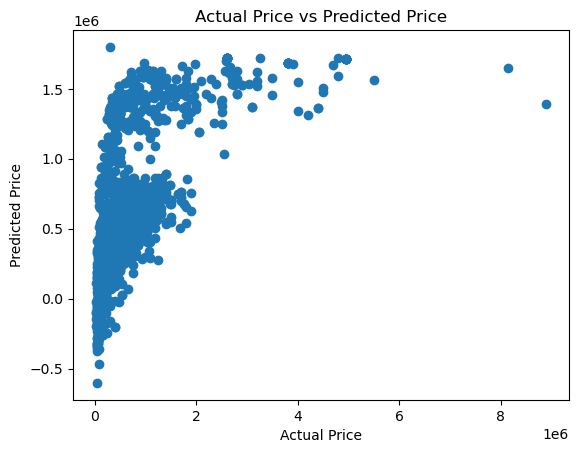

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [19]:
testing_data_prediction = lin_reg.predict(X_test)

In [20]:
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4325300001448774


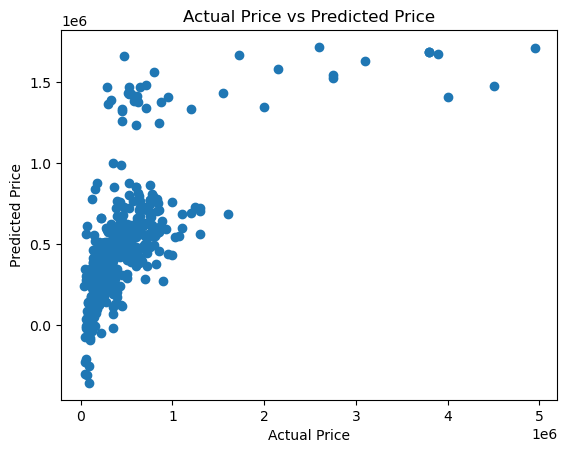

In [21]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [22]:
lass_reg = Lasso()

In [23]:
lass_reg.fit(X_train,Y_train)

Lasso()

In [24]:
training_data_prediction = lass_reg.predict(X_train)

In [25]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.441703567028349


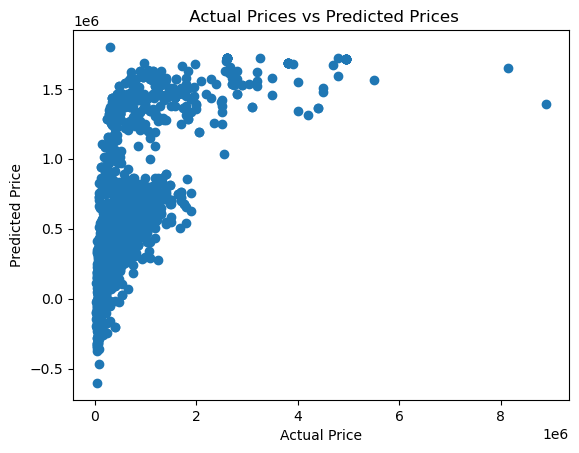

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
test_data_prediction = lass_reg.predict(X_test)

In [28]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4325295019078319


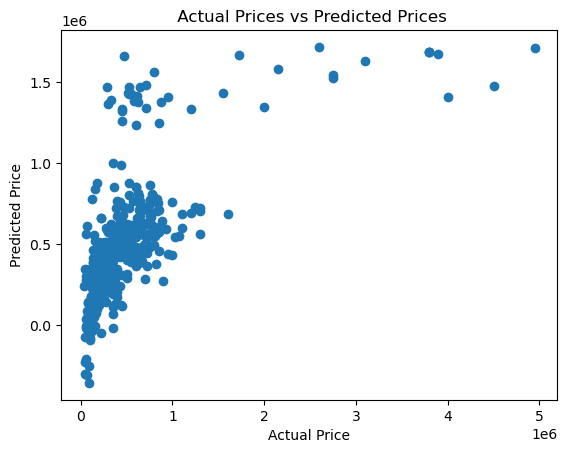

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()